# Table of Contents
<a id="table-of-contents"></a>

0. [Import Libraries](#imports)
1. [Import Data](#import_data)
2. [Data Exploration](#data_exploration) 
3. [Data Cleaning](#data_cleaning) 
4. [Data Preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
    5.1. [Train-test split](#train_test_split)<br>
    5.2. [Fit a model to the data](#fit_model)<br> 
    5.3. [Model evaluation](#model_evaluation)<br> 
    5.4. [Fix problems](#fix_problems) 
6. [Feature engineering](#feature_engineering) 
7. [Model training](#model_training)<br> 
    7.1. [Decision Tree](#decision_tree)<br> 
    7.2. [Random Forest](#random_forest) - 
      [Overfit](#overfit) - 
      [Underfit](#underfit)<br> 
    7.3. [Gradient boosting](#gradient_boosting)<br> 
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances) 
8. [Tuning](#tuning)<br> 
    8.1 [Find best parameters](#find_best_parameters)<br> 
    Bonus: [Classification](#classification) 

# 0. Import Libraries
<a id="imports"></a>
<br>
[Back to the Top](#table-of-contents)

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

# 1. Import Data
<a id="import_data"></a>
<br>
[Back to the Top](#table-of-contents)

In [4]:
#import data into jupyter notebook 
taxi_jan_2024 = pd.read_parquet("data/yellow_tripdata_2024-01.parquet") 
taxi_df = pd.concat([taxi_jan_2024])

In [5]:
#print the shape to know the number of rows and columns of the dataset and the preview of the data
print(taxi_df.shape)
taxi_df.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [6]:
#print the end of the dataset 
taxi_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN
2964623,1,2024-01-31 23:58:25,2024-02-01 00:13:30,NaN,8.10,NaN,None,138,75,0,32.40,7.75,0.5,7.29,6.94,1.0,55.88,NaN,NaN


# 2. Data Exploration 
<a id="data_exploration"></a>
<br>
[Back to the Top](#table-of-contents)

In [7]:
#Display the columns of the dataset
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
#Drop some olumns that wont be relevant to the predictive algorithm 
taxi_data = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 
       'PULocationID', 'DOLocationID', 'payment_type', 
       'total_amount']]

In [9]:
#print the preview of the data
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


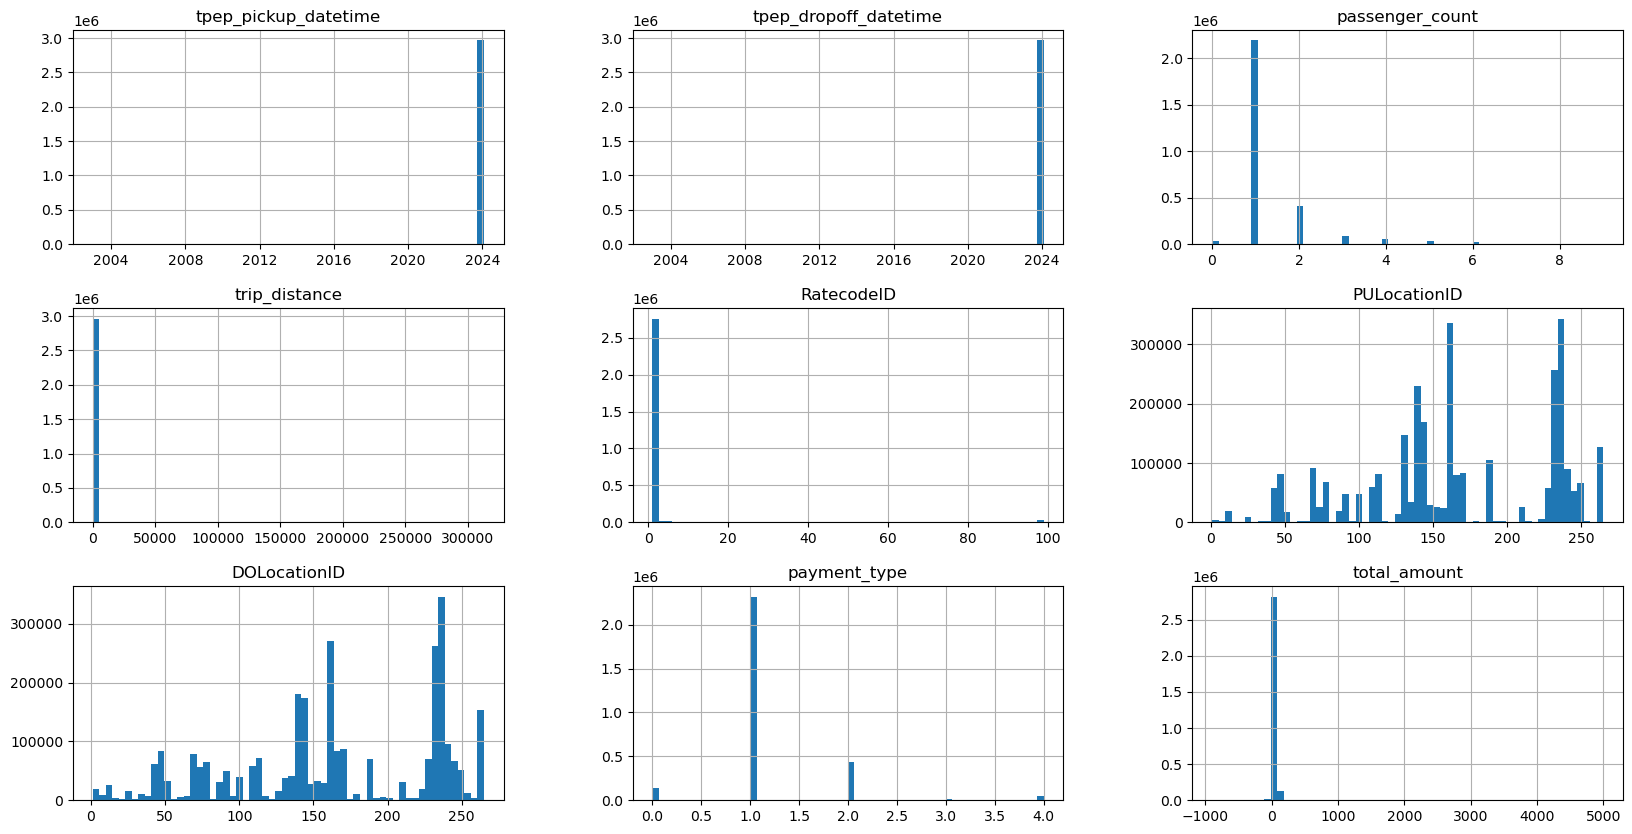

In [10]:
#plotting help explore the data 
taxi_data.hist(figsize=(20, 10), bins =60)
plt.show()

* tpep_pickup_date = It shows that all the data was collected in the 2024 so that shows that data is accurate 
* tpep_dropoff_datetime = It shows that all the data was collected in the 2024 so that shows that data is accurate
* passenger_count = The graph shows that most of the passengers that pick the taxi was between 1 and 4 and there are some few outliers like *0, 8 and 10*, which could be a human error because it is entered manually by the driver 
* trip_distance = The elapsed trip distance in miles reported by the taximeter, from the graph most of the data points are within 0 and 1000miles and some few outliers which are greater that 10000miles 
* RatecodeID = The final rate code in effect at the end of the trip, from the graph it shows that most commuters paid a regular fare charged by the taxi. 
* PULocationID =  TLC Taxi Zone in which the taximeter was engaged
* DOLocationID =  TLC Taxi Zone in which the taximeter was disengaged
* payment_type = A numeric code signifying how the passenger paid for the trip(1= Credit card, 2= Cash, 3= No charge 4= Dispute, 5= Unknown, 6= Voided trip), from the graph we can tell that most of the mode of payment was credit card and cash, with an outlier 0 - which would have to be investigated
* total_amount = The total amount charged to passengers. Does not include cash tips, the graph shows that most passengers paid between 1-100USD, there are outliers like USD5000 - which would have to investigated. 


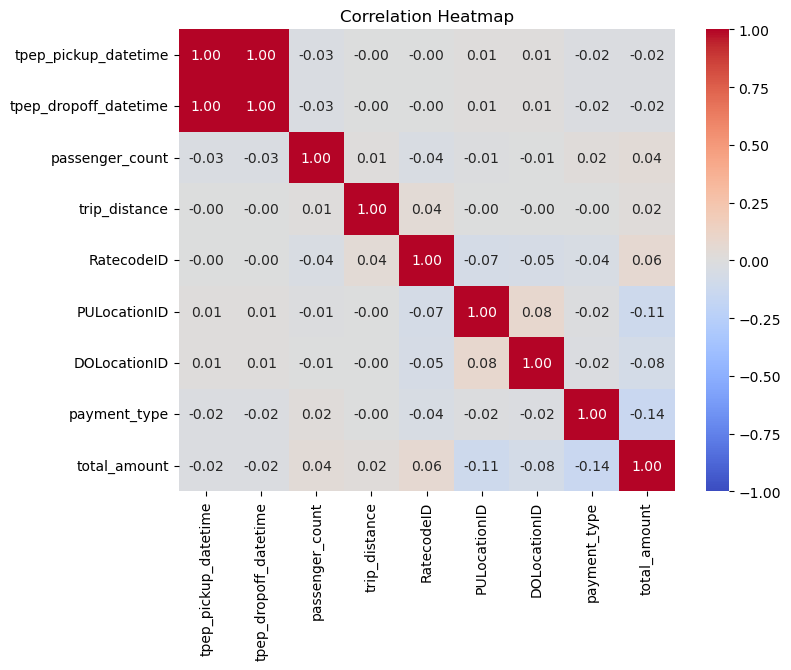

In [11]:
corr_matrix = taxi_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1)
memory usage: 180.9 MB


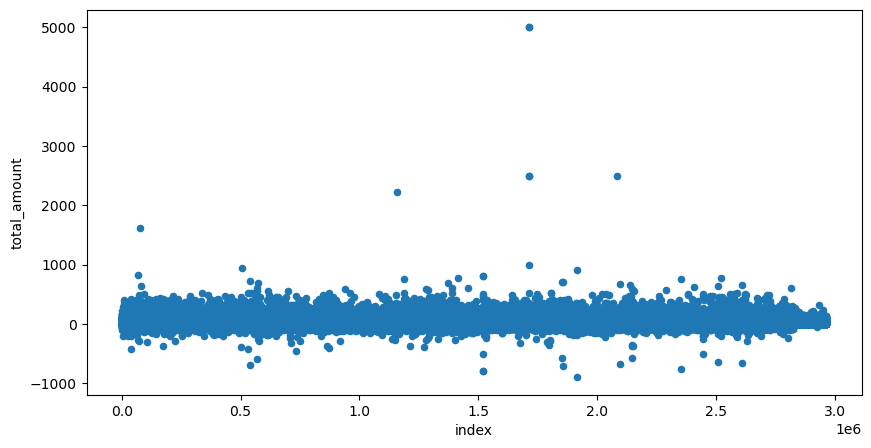

In [13]:
#Plot a scatterplot to visualize the distribution of the total amount paid by commuters 
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x= 'index', figsize=(10,5))
plt.show()

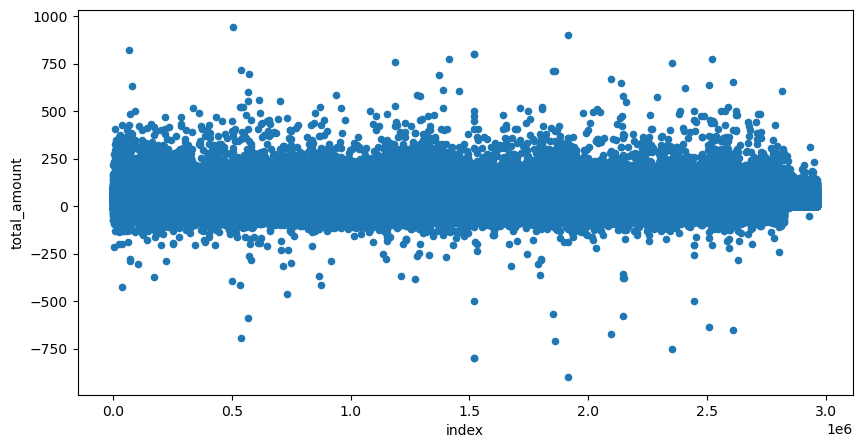

In [14]:
taxi_data[taxi_data['total_amount']<1000].reset_index()\
.plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

#### Two things to deal with negative values and high values 

(35504, 9)


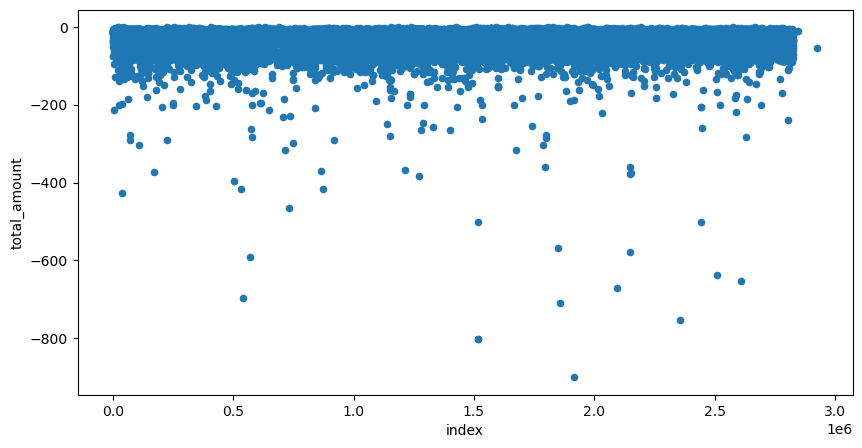

In [15]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index()\
.plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [16]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [17]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

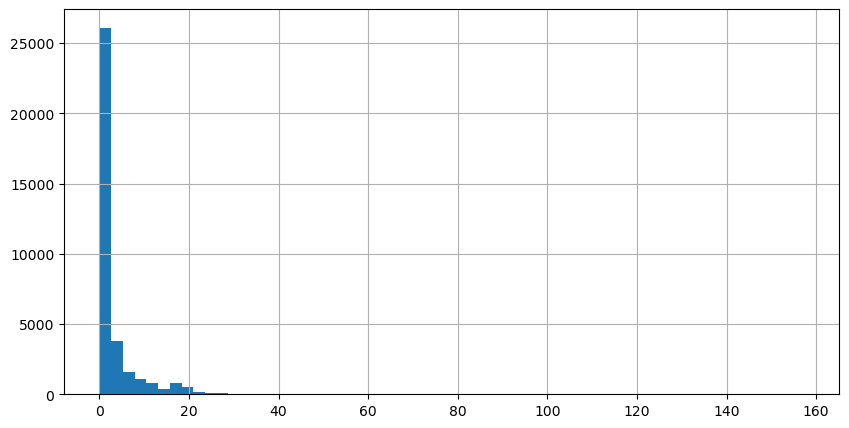

In [18]:
taxi_data[taxi_data['total_amount']<0]\
['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()

In [19]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,193,193,2,0.0


In [20]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

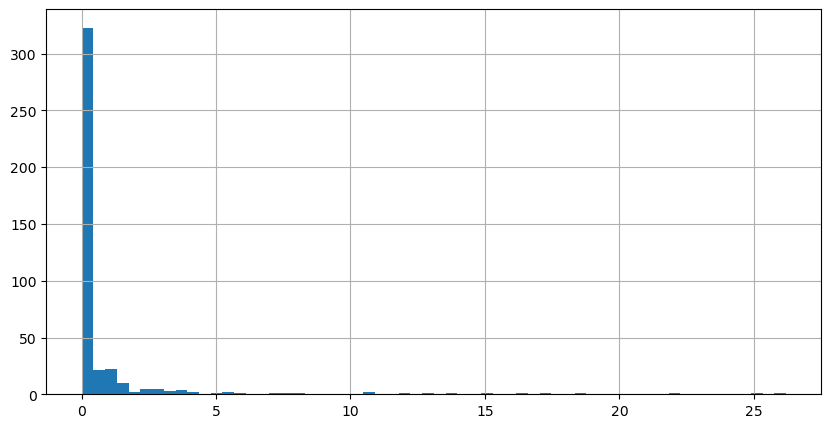

In [21]:
taxi_data[taxi_data['total_amount']==0]['trip_distance']\
.hist(bins=60, figsize=(10, 5))
plt.show()

In [22]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

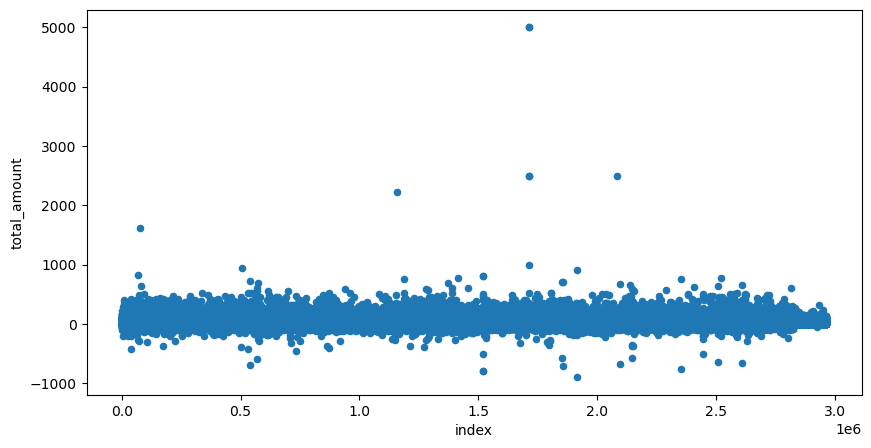

In [23]:
taxi_data.reset_index()\
.plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [24]:
#taxi_data where total amount is greater tha 200 
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [25]:
#mean total_amount of the taxi_data
taxi_data['total_amount'].mean()

26.801504770925415

In [26]:
#median total_amount of the taxi_data 
taxi_data['total_amount'].median()

20.1

# 3. Data Cleaning 
<a id="data_cleaning"></a>
<br>
[Back to the Top](#table-of-contents)

In [27]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)\
                               & (taxi_data['total_amount'])<200]

In [28]:
#check for the number of rows and columns in the taxi_data_filtered dataset 
print(taxi_data_filtered.shape)

(2964624, 9)


In [29]:
#check for missing values
taxi_data_filtered.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [30]:
#Explore the empty values to find if there are some correlations why there are empty values 
taxi_data_filtered[(taxi_data_filtered['passenger_count'].isna())\
         &(taxi_data_filtered['RatecodeID'].isna())]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2824462,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,143,141,0,16.72
2824463,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,236,238,0,17.16
2824464,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,142,79,0,25.01
2824465,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,237,4,0,21.79
2824466,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,244,50,0,38.65
...,...,...,...,...,...,...,...,...,...
2964619,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,107,263,0,21.77
2964620,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,114,236,0,25.74
2964621,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,211,25,0,23.97
2964622,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,107,13,0,33.46


In [31]:
#drop empty values 
taxi_data_filtered.dropna(subset=['passenger_count', 'RatecodeID'], inplace=True)

In [32]:
print(taxi_data_filtered.shape)
taxi_data_filtered.isna().sum()

(2824462, 9)


tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [33]:
#check for data range constraints 
taxi_data_filtered['payment_type'].value_counts()

payment_type
1    2319046
2     439191
4      46628
3      19597
Name: count, dtype: int64

* From the value counts of payment type we can tell that the payment type column is accurate

In [34]:
#check for data range constraints 
taxi_data_filtered['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

* From the value counts of RatecodeID, there is an outlier of 99.0 that is not suppose to be in the data range and would have to be dropped 

In [35]:
#Drop the rows where ratecodeid == 99.0 
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['RatecodeID'] != 99.0]
print(taxi_data_filtered.shape)

(2795799, 9)


In [36]:
taxi_data_filtered['total_amount'].value_counts()

total_amount
 16.80     45217
 12.60     43108
 21.00     35361
 15.12     26474
 15.96     26222
           ...  
-79.84         1
 161.18        1
 137.54        1
 253.66        1
-52.63         1
Name: count, Length: 18328, dtype: int64



# 3. Data Preparation  
<a id="data_preparation"></a>
<br>
[Back to the Top](#table-of-contents)

In [37]:
taxi_data_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [39]:
taxi_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2795799 entries, 0 to 2824461
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1)
memory usage: 192.0 MB


In [40]:
taxi_data_filtered.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,2795799,2795799,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06
mean,2024-01-17 01:05:09.516053504,2024-01-17 01:20:26.302648832,1.342754e+00,3.207189e+00,1.075610e+00,1.666517e+02,1.658680e+02,1.221134e+00,2.674900e+01
min,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02
25%,2024-01-09 15:35:16,2024-01-09 15:51:37,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.160000e+02,1.000000e+00,1.512000e+01
50%,2024-01-17 10:35:04,2024-01-17 10:53:07,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.980000e+01
75%,2024-01-24 18:45:32,2024-01-24 19:00:21,1.000000e+00,3.030000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.820000e+01
max,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,1.540032e+04,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.225300e+03
std,NaN,NaN,8.539132e-01,1.214368e+01,4.154563e-01,6.293934e+01,6.905405e+01,5.350827e-01,2.323823e+01


In [42]:
taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'] == '2002-12-31 22:59:39']

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
53119,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,170,170,3,-10.5
53120,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,170,170,3,10.5


* While prepping the data, there was an outlier found that is year 2002 which would have be investigated and cleaned 